In [0]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [0]:
sc.stop()

In [0]:
sc = SparkContext()
spark = SparkSession(sc)
sqlContext = SQLContext(sc)

In [0]:
import findspark
findspark.init()

In [0]:
in_bucket="s3://dsde6007.rahul/devicestatus.txt"

In [0]:
data = sc.textFile(in_bucket)

In [0]:
def clean_data(data):
  data = data.split("\n")
  data = re.sub("[\|/]", ",", data)
  data = data.split(",")
  data = (data[-1], data[-2], data[0], data[1])
  data[3] = data[3].split()

In [0]:
data = clean_data(data)

In [0]:
data.take(5)

[(33.6894754264, -117.543308253, '2014-03-15:10:10:20', 'Sorrento', 'F41L'),
 (37.4321088904, -121.485029632, '2014-03-15:10:10:20', 'MeeToo', '1.0'),
 (39.4378908349, -120.938978486, '2014-03-15:10:10:20', 'MeeToo', '1.0'),
 (39.3635186767, -119.400334708, '2014-03-15:10:10:20', 'Sorrento', 'F41L'),
 (33.1913581092, -116.448242643, '2014-03-15:10:10:20', 'Ronin', 'Novelty')]

In [0]:
data = data.collect()

In [0]:
df = pd.DataFrame(data, columns=['latitude', 'longitude', 'datestr', 'manufacturer', 'model_name'])
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)
df['datestr'] = df['datestr'].astype(str)
df['manufacturer'] = df['manufacturer'].astype(str)
df['model_name'] = df['model_name'].astype(str)

In [0]:
df['date'] = df['datestr'].astype('datetime64[ns]')

In [0]:
df = df['latitude', 'longitude', 'date', 'manufacturer', 'model_name']

In [0]:
out_bucket="s3://dsci6007.rahul/data"

In [0]:
df.rdd.coalesce(1).saveAsTextFile(out_bucket)

In [0]:
data = sc.textFile(out_bucket)

In [0]:
df = pd.DataFrame(data, columns=['latitude', 'longitude', 'datestr', 'manufacturer', 'model_name'])
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)
df['datestr'] = df['datestr'].astype(str)
df['manufacturer'] = df['manufacturer'].astype(str)
df['model_name'] = df['model_name'].astype(str)

In [0]:
df['date'] = df['datestr'].astype('datetime64[ns]')

In [0]:
df = df['latitude', 'longitude', 'date', 'manufacturer', 'model_name']

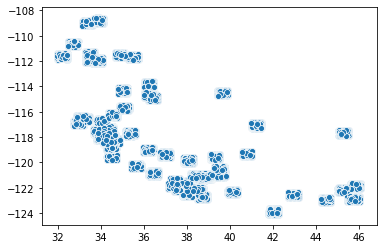

In [0]:
import seaborn as sns
ax = sns.scatterplot(x=df['latitude'], y=df['longitude'])